In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

In [13]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

train

,id,Country,Year,Month,FoodPriceIndex
0,3501,Mexico,1971,11,0.0000
1,60601,South Africa,2002,7,43.9000
2,64399,Japan,2004,8,89.8000
3,24227,France,1983,1,48.9000
4,63779,Japan,2004,4,90.2000
...,...,...,...,...,...
11611,8347,Sweden,1974,6,17.9000
11612,32121,Germany,1987,4,66.1407
11613,8561,Germany,1974,8,45.1606
11614,45917,Denmark,1994,9,65.6000


In [14]:
train2 = train.copy()

train2 = train2[['Year', 'FoodPriceIndex']]

train2.head()

,Year,FoodPriceIndex
0,1971,0.0
1,2002,43.9
2,2004,89.8
3,1983,48.9
4,2004,90.2


In [15]:
train2.isna().mean(), train2.isna().sum()

(Year              0.000000
 FoodPriceIndex    0.029959
 dtype: float64,
 Year                0
 FoodPriceIndex    348
 dtype: int64)

In [16]:
train2.dropna(inplace=True)

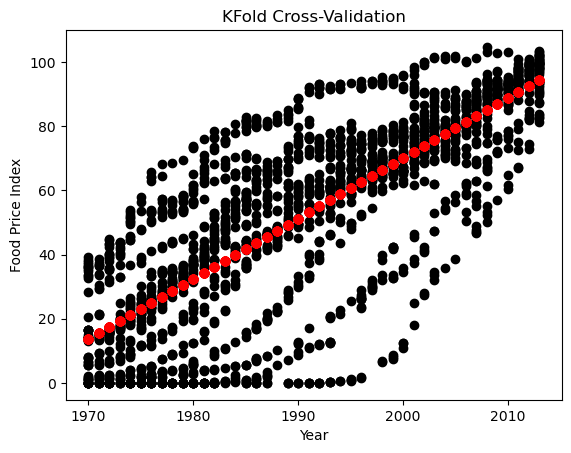

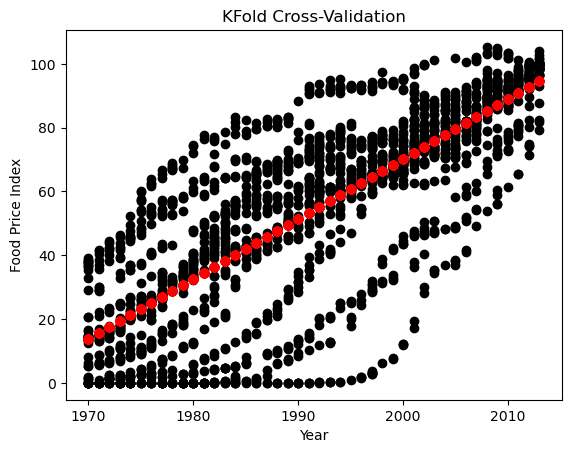

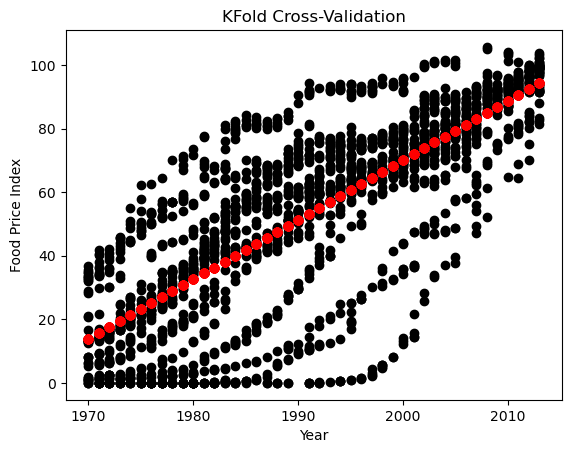

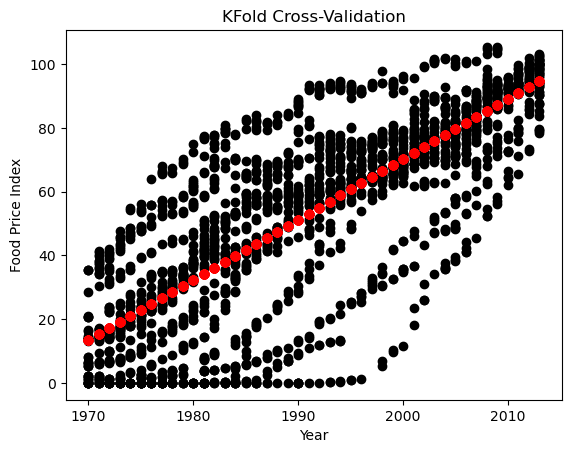

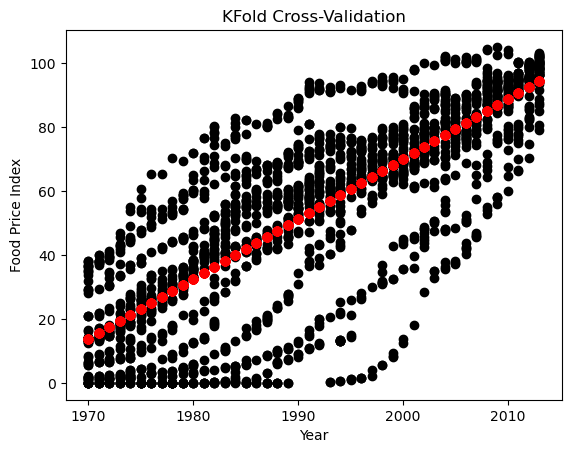

In [ ]:
X = train2[['Year']].values
y = train2['FoodPriceIndex'].values

model = LinearRegression()

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    plt.scatter(X_test, y_test, color='black')
    plt.scatter(X_test, y_pred, color='red')

    plt.title('KFold Cross-Validation')
    plt.xlabel('Year')
    plt.ylabel('Food Price Index')
    plt.show()

In [18]:
# predict on test data
X_test = test[['Year']].values
y_test = model.predict(X_test)

# save predictions to CSV
sample_submission = pd.read_csv('data/sample_submission.csv')
sample_submission['FoodPriceIndex'] = y_test

sample_submission

,id,FoodPriceIndex
0,99116,113.415553
1,97687,111.533120
2,92061,105.885820
3,95122,109.650686
4,92296,105.885820
...,...,...
2635,96922,111.533120
2636,93502,107.768253
2637,87476,102.120953
2638,93366,107.768253


In [19]:
sample_submission.to_csv('submission/submission_linear.csv', index=False)